In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', 50)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("📥 LOADING LENDING CLUB DATA")
print("="*60)

# Load sample (100K rows for speed)
df = pd.read_csv(
    '../data/accepted_2007_to_2018Q4.csv',
    nrows=100000,  # Start with 100K rows
    low_memory=False
)

print(f"\n✅ Loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\n📋 Dataset Info:")
print(f"   - Memory usage: {df.memory_usage().sum() / 1024**2:.1f} MB")
print(f"   - Date range: {df['issue_d'].min()} to {df['issue_d'].max()}")

# Show first few rows
print(f"\n📊 First 3 rows:")
df.head(3)

📥 LOADING LENDING CLUB DATA

✅ Loaded: 100,000 rows × 151 columns

📋 Dataset Info:
   - Memory usage: 115.2 MB
   - Date range: Dec-2015 to Oct-2015

📊 First 3 rows:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


🎯 TARGET VARIABLE: loan_status

Loan Status Distribution:
loan_status
Fully Paid            70288
Charged Off           17603
Current               11402
Late (31-120 days)      441
In Grace Period         199
Late (16-30 days)        66
Default                   1
Name: count, dtype: int64

Percentages:
loan_status
Fully Paid            70.29
Charged Off           17.60
Current               11.40
Late (31-120 days)     0.44
In Grace Period        0.20
Late (16-30 days)      0.07
Default                0.00
Name: proportion, dtype: float64


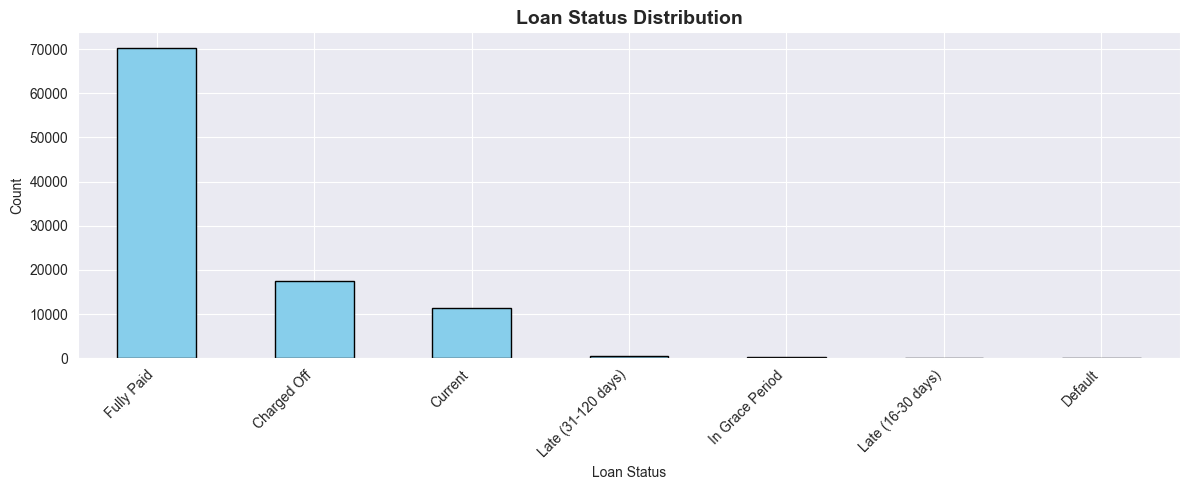

In [3]:
print("="*60)
print("🎯 TARGET VARIABLE: loan_status")
print("="*60)

# Check loan status distribution
print("\nLoan Status Distribution:")
print(df['loan_status'].value_counts())
print(f"\nPercentages:")
print(df['loan_status'].value_counts(normalize=True).mul(100).round(2))

# Visualize
plt.figure(figsize=(12, 5))
df['loan_status'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Loan Status Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

🔧 CREATING BINARY TARGET

✅ Binary Target Created:
   Good Loans (0): 81,690 (81.7%)
   Bad Loans (1):  18,310 (18.3%)


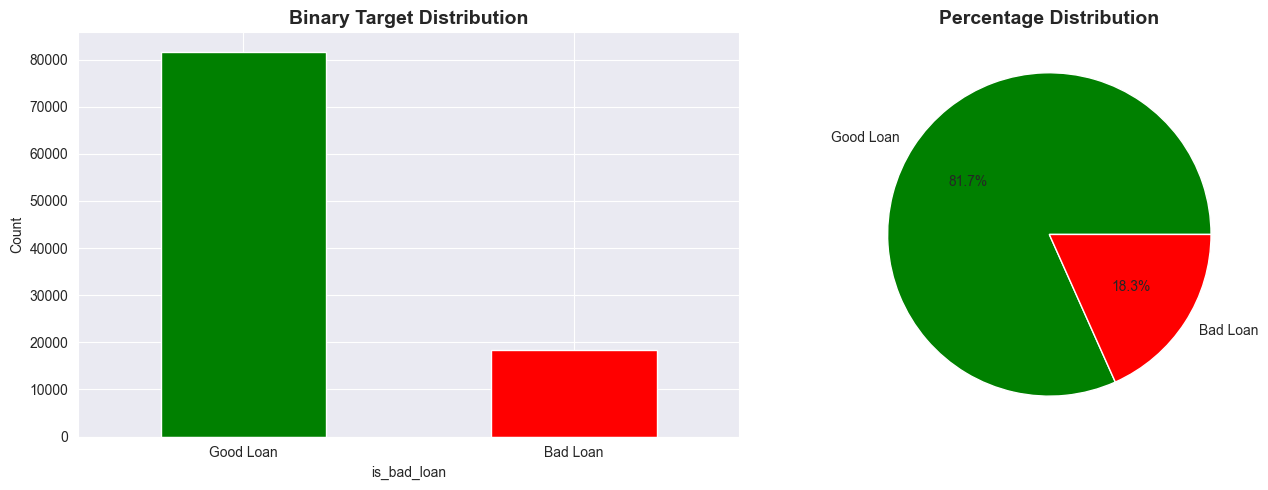

In [4]:
print("="*60)
print("🔧 CREATING BINARY TARGET")
print("="*60)

# Define good vs bad loans
good_loans = ['Fully Paid', 'Current']
bad_loans = ['Charged Off', 'Default', 'Late (31-120 days)', 
             'Late (16-30 days)', 'In Grace Period']

# Create binary target
df['is_bad_loan'] = df['loan_status'].apply(
    lambda x: 1 if x in bad_loans else 0
)

print(f"\n✅ Binary Target Created:")
print(f"   Good Loans (0): {(df['is_bad_loan']==0).sum():,} ({(df['is_bad_loan']==0).sum()/len(df)*100:.1f}%)")
print(f"   Bad Loans (1):  {(df['is_bad_loan']==1).sum():,} ({(df['is_bad_loan']==1).sum()/len(df)*100:.1f}%)")

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

df['is_bad_loan'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Binary Target Distribution', fontsize=14, fontweight='bold')
ax[0].set_xticklabels(['Good Loan', 'Bad Loan'], rotation=0)
ax[0].set_ylabel('Count')

df['is_bad_loan'].value_counts(normalize=True).plot(kind='pie', ax=ax[1], 
                                                      autopct='%1.1f%%',
                                                      colors=['green', 'red'],
                                                      labels=['Good Loan', 'Bad Loan'])
ax[1].set_title('Percentage Distribution', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [5]:
print("="*60)
print("🔍 SELECTING FEATURES")
print("="*60)

# Important features for credit approval
important_features = [
    'loan_amnt',           # Loan amount
    'int_rate',            # Interest rate  
    'installment',         # Monthly payment
    'grade',               # Loan grade (A-G)
    'emp_length',          # Employment length
    'home_ownership',      # Home ownership status
    'annual_inc',          # Annual income
    'verification_status', # Income verification
    'purpose',             # Loan purpose
    'dti',                 # Debt-to-income ratio
    'delinq_2yrs',        # Delinquencies
    'inq_last_6mths',     # Credit inquiries
    'open_acc',            # Open accounts
    'pub_rec',             # Public records
    'revol_bal',           # Revolving balance
    'revol_util',          # Revolving utilization
    'total_acc',           # Total accounts
]

# Keep only features that exist
features = [f for f in important_features if f in df.columns]

print(f"\n✅ Selected {len(features)} features:")
for i, feat in enumerate(features, 1):
    print(f"   {i:2d}. {feat}")

# Create X and y
X = df[features].copy()
y = df['is_bad_loan'].copy()

print(f"\n📊 Feature Matrix: {X.shape}")
print(f"🎯 Target Vector: {y.shape}")

🔍 SELECTING FEATURES

✅ Selected 17 features:
    1. loan_amnt
    2. int_rate
    3. installment
    4. grade
    5. emp_length
    6. home_ownership
    7. annual_inc
    8. verification_status
    9. purpose
   10. dti
   11. delinq_2yrs
   12. inq_last_6mths
   13. open_acc
   14. pub_rec
   15. revol_bal
   16. revol_util
   17. total_acc

📊 Feature Matrix: (100000, 17)
🎯 Target Vector: (100000,)


⚠️  MISSING VALUES

Missing values per feature:
            Missing  Percentage
emp_length     6112       6.112
revol_util       37       0.037
dti               2       0.002


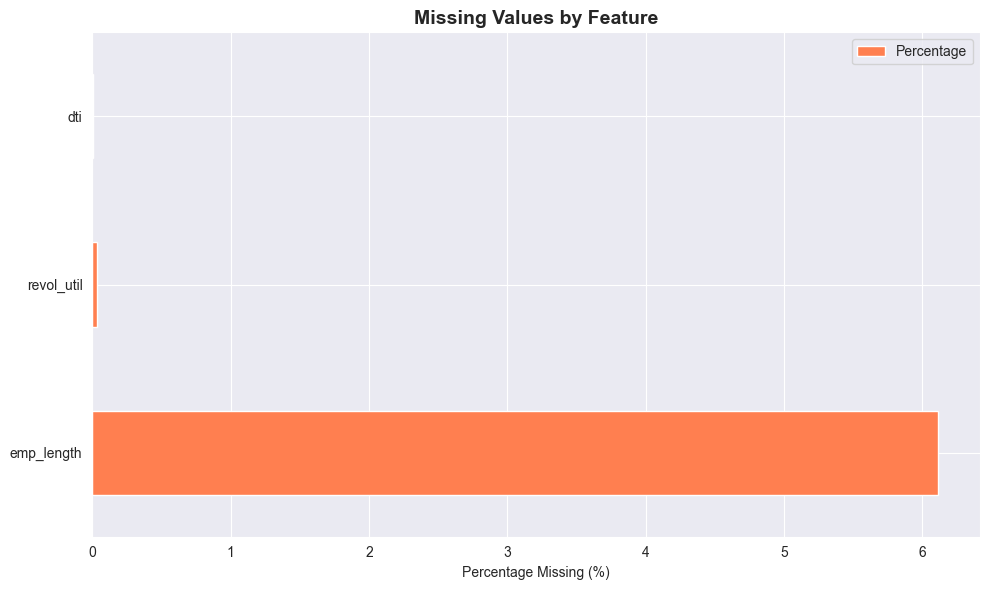

In [6]:
print("="*60)
print("⚠️  MISSING VALUES")
print("="*60)

# Check missing values
missing = X.isnull().sum()
missing_pct = (missing / len(X)) * 100

missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
}).sort_values('Percentage', ascending=False)

print("\nMissing values per feature:")
print(missing_df[missing_df['Missing'] > 0])

# Visualize if any missing
if missing_df['Missing'].sum() > 0:
    missing_df[missing_df['Missing'] > 0].plot(
        kind='barh', 
        y='Percentage',
        figsize=(10, 6),
        color='coral'
    )
    plt.title('Missing Values by Feature', fontsize=14, fontweight='bold')
    plt.xlabel('Percentage Missing (%)')
    plt.tight_layout()
    plt.show()

In [8]:
print("="*60)
print("🔧 PREPROCESSING DATA")
print("="*60)

from sklearn.preprocessing import LabelEncoder

X_processed = X.copy()

# 1. Encode categorical features
categorical_features = ['grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']

for col in categorical_features:
    if col in X_processed.columns:
        le = LabelEncoder()
        X_processed[col] = le.fit_transform(X_processed[col].astype(str))
        print(f"   ✅ Encoded: {col}")

# 2. Handle numeric features - check if they're already numeric
numeric_features = ['int_rate', 'revol_util']

for col in numeric_features:
    if col in X_processed.columns:
        # Check if it's already numeric
        if X_processed[col].dtype == 'object':
            # Remove % sign if it's a string
            X_processed[col] = X_processed[col].str.replace('%', '').astype(float)
            print(f"   ✅ Cleaned: {col}")
        else:
            print(f"   ✅ Already numeric: {col}")

# 3. Fill missing values
print(f"\n📊 Handling missing values...")
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_processed = pd.DataFrame(
    imputer.fit_transform(X_processed),
    columns=X_processed.columns
)

print(f"   ✅ Missing values filled")

# 4. Scale features
print(f"\n⚖️  Scaling features...")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)
X_scaled = pd.DataFrame(X_scaled, columns=X_processed.columns)

print(f"   ✅ Features scaled")

print(f"\n✅ Preprocessing complete!")
print(f"   Shape: {X_scaled.shape}")
print(f"   No missing values: {X_scaled.isnull().sum().sum() == 0}")

🔧 PREPROCESSING DATA
   ✅ Encoded: grade
   ✅ Encoded: emp_length
   ✅ Encoded: home_ownership
   ✅ Encoded: verification_status
   ✅ Encoded: purpose
   ✅ Already numeric: int_rate
   ✅ Already numeric: revol_util

📊 Handling missing values...
   ✅ Missing values filled

⚖️  Scaling features...
   ✅ Features scaled

✅ Preprocessing complete!
   Shape: (100000, 17)
   No missing values: True


In [9]:
print("="*60)
print("📊 SPLITTING DATA")
print("="*60)

from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Keep same ratio of good/bad loans
)

print(f"\n✅ Data split complete:")
print(f"   Training set:   {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X_scaled)*100:.0f}%)")
print(f"   Test set:       {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X_scaled)*100:.0f}%)")
print(f"\n   Train - Good loans: {(y_train==0).sum():,} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"   Train - Bad loans:  {(y_train==1).sum():,} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")
print(f"\n   Test - Good loans:  {(y_test==0).sum():,} ({(y_test==0).sum()/len(y_test)*100:.1f}%)")
print(f"   Test - Bad loans:   {(y_test==1).sum():,} ({(y_test==1).sum()/len(y_test)*100:.1f}%)")

📊 SPLITTING DATA

✅ Data split complete:
   Training set:   80,000 samples (80%)
   Test set:       20,000 samples (20%)

   Train - Good loans: 65,352 (81.7%)
   Train - Bad loans:  14,648 (18.3%)

   Test - Good loans:  16,338 (81.7%)
   Test - Bad loans:   3,662 (18.3%)


In [10]:
print("="*60)
print("🤖 TRAINING MODELS")
print("="*60)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Model 1: Logistic Regression
print("\n1️⃣ Training Logistic Regression...")
lr_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # Handle imbalanced data
    random_state=42
)

lr_model.fit(X_train, y_train)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]
lr_pred = (lr_pred_proba >= 0.5).astype(int)
lr_roc_auc = roc_auc_score(y_test, lr_pred_proba)

print(f"   ✅ Logistic Regression ROC-AUC: {lr_roc_auc:.4f}")

# Model 2: Random Forest
print("\n2️⃣ Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

rf_model.fit(X_train, y_train)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
rf_pred = (rf_pred_proba >= 0.5).astype(int)
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)

print(f"   ✅ Random Forest ROC-AUC: {rf_roc_auc:.4f}")

# Compare
print(f"\n{'='*60}")
print(f"🏆 MODEL COMPARISON")
print(f"{'='*60}")
print(f"Logistic Regression: {lr_roc_auc:.4f}")
print(f"Random Forest:       {rf_roc_auc:.4f}")

best_model_name = "Random Forest" if rf_roc_auc > lr_roc_auc else "Logistic Regression"
best_model = rf_model if rf_roc_auc > lr_roc_auc else lr_model
best_roc_auc = max(rf_roc_auc, lr_roc_auc)

print(f"\n🥇 Best Model: {best_model_name} ({best_roc_auc:.4f})")

🤖 TRAINING MODELS

1️⃣ Training Logistic Regression...
   ✅ Logistic Regression ROC-AUC: 0.7020

2️⃣ Training Random Forest...
   ✅ Random Forest ROC-AUC: 0.7042

🏆 MODEL COMPARISON
Logistic Regression: 0.7020
Random Forest:       0.7042

🥇 Best Model: Random Forest (0.7042)


📊 DETAILED EVALUATION - RANDOM FOREST

📋 Classification Report:
              precision    recall  f1-score   support

   Good Loan      0.889     0.669     0.764     16338
    Bad Loan      0.298     0.626     0.404      3662

    accuracy                          0.662     20000
   macro avg      0.593     0.648     0.584     20000
weighted avg      0.781     0.662     0.698     20000


📊 Confusion Matrix:
                 Predicted
                Good    Bad
Actual Good     10938   5400
       Bad       1368   2294


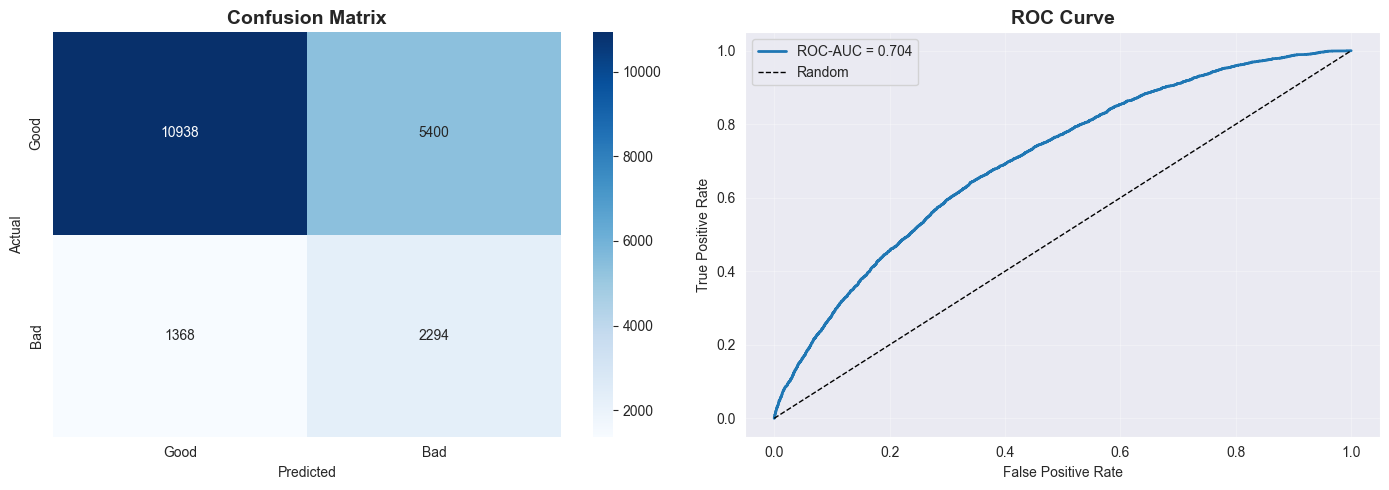

In [11]:
print("="*60)
print("📊 DETAILED EVALUATION - RANDOM FOREST")
print("="*60)

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, rf_pred, 
                          target_names=['Good Loan', 'Bad Loan'],
                          digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
print("\n📊 Confusion Matrix:")
print(f"                 Predicted")
print(f"                Good    Bad")
print(f"Actual Good     {cm[0,0]:5d}  {cm[0,1]:5d}")
print(f"       Bad      {cm[1,0]:5d}  {cm[1,1]:5d}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Good', 'Bad'],
            yticklabels=['Good', 'Bad'])
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)

axes[1].plot(fpr, tpr, linewidth=2, label=f'ROC-AUC = {rf_roc_auc:.3f}')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🎯 FEATURE IMPORTANCE

Top 10 Most Important Features:
        Feature  Importance
1      int_rate    0.307324
3         grade    0.185878
9           dti    0.075953
2   installment    0.051661
6    annual_inc    0.048447
14    revol_bal    0.048268
15   revol_util    0.048049
0     loan_amnt    0.040025
12     open_acc    0.034589
16    total_acc    0.033639


<Figure size 1000x600 with 0 Axes>

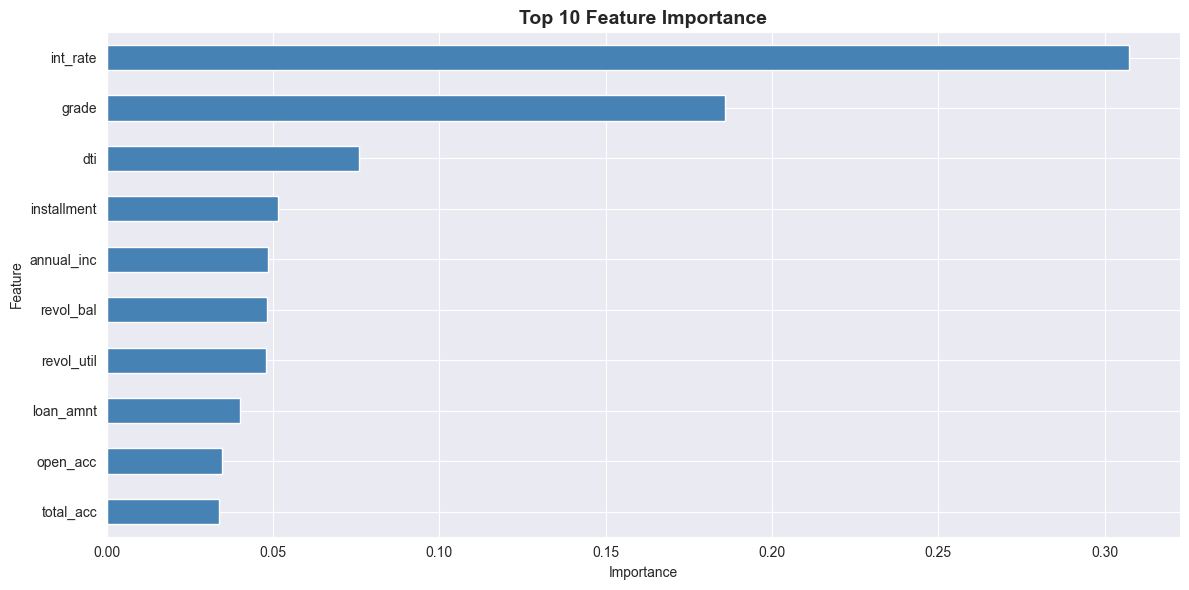

In [12]:
print("="*60)
print("🎯 FEATURE IMPORTANCE")
print("="*60)

# Get feature importance from Random Forest
importance_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

# Visualize
plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', 
                            legend=False, color='steelblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [13]:
print("="*60)
print("💾 SAVING MODEL AND PREPROCESSORS")
print("="*60)

import joblib
import os

# Create artifacts directory
os.makedirs('../artifacts', exist_ok=True)

# Save the best model (Random Forest)
joblib.dump(rf_model, '../artifacts/credit_model.joblib')
print(f"✅ Model saved: credit_model.joblib")

# Save preprocessors
joblib.dump(imputer, '../artifacts/imputer.joblib')
joblib.dump(scaler, '../artifacts/scaler.joblib')
print(f"✅ Preprocessors saved")

# Save feature names and encoders (for later use)
joblib.dump(features, '../artifacts/feature_names.joblib')
print(f"✅ Feature names saved")

# Save model performance
model_info = {
    'roc_auc': rf_roc_auc,
    'model_type': 'RandomForestClassifier',
    'n_features': len(features),
    'training_samples': len(X_train),
    'features': features
}
joblib.dump(model_info, '../artifacts/model_info.joblib')
print(f"✅ Model info saved")

print(f"\n🎉 All artifacts saved to: ml/artifacts/")
print(f"\nSaved files:")
print(f"   - credit_model.joblib")
print(f"   - imputer.joblib")
print(f"   - scaler.joblib")
print(f"   - feature_names.joblib")
print(f"   - model_info.joblib")

💾 SAVING MODEL AND PREPROCESSORS
✅ Model saved: credit_model.joblib
✅ Preprocessors saved
✅ Feature names saved
✅ Model info saved

🎉 All artifacts saved to: ml/artifacts/

Saved files:
   - credit_model.joblib
   - imputer.joblib
   - scaler.joblib
   - feature_names.joblib
   - model_info.joblib


In [14]:
print("="*60)
print("🧪 TEST PREDICTION")
print("="*60)

# Create a test applicant
test_applicant = {
    'loan_amnt': 15000,
    'int_rate': 12.5,
    'installment': 500,
    'grade': 2,  # B grade (already encoded)
    'emp_length': 5,  # 5 years
    'home_ownership': 1,  # MORTGAGE
    'annual_inc': 65000,
    'verification_status': 1,  # Verified
    'purpose': 2,  # debt_consolidation
    'dti': 18.5,
    'delinq_2yrs': 0,
    'inq_last_6mths': 1,
    'open_acc': 8,
    'pub_rec': 0,
    'revol_bal': 12000,
    'revol_util': 45.5,
    'total_acc': 15
}

# Convert to DataFrame
test_df = pd.DataFrame([test_applicant])

# Predict
probability = rf_model.predict_proba(test_df)[0, 1]
decision = "REJECT" if probability >= 0.5 else "APPROVE"
risk_level = "HIGH" if probability >= 0.7 else "MEDIUM" if probability >= 0.3 else "LOW"

print(f"\n{'='*60}")
print(f"📊 PREDICTION RESULT")
print(f"{'='*60}")
print(f"\nApplicant Profile:")
print(f"   Loan Amount: ${test_applicant['loan_amnt']:,}")
print(f"   Interest Rate: {test_applicant['int_rate']}%")
print(f"   Annual Income: ${test_applicant['annual_inc']:,}")
print(f"   DTI: {test_applicant['dti']}%")
print(f"   Credit Inquiries: {test_applicant['inq_last_6mths']}")

print(f"\n🎯 Model Prediction:")
print(f"   Default Probability: {probability*100:.2f}%")
print(f"   Decision: {decision}")
print(f"   Risk Level: {risk_level}")

# Calculate recommended credit limit (if approved)
if decision == "APPROVE":
    base_limit = 5000
    risk_multiplier = 1 - probability
    credit_limit = int(base_limit * (1 + risk_multiplier * 2))
    print(f"\n💳 Recommended Credit Limit: ${credit_limit:,}")

🧪 TEST PREDICTION

📊 PREDICTION RESULT

Applicant Profile:
   Loan Amount: $15,000
   Interest Rate: 12.5%
   Annual Income: $65,000
   DTI: 18.5%
   Credit Inquiries: 1

🎯 Model Prediction:
   Default Probability: 44.32%
   Decision: APPROVE
   Risk Level: MEDIUM

💳 Recommended Credit Limit: $10,567
